#Activity 13

In [2]:
import numpy as np
import pandas as pd
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import random


url = 'https://raw.githubusercontent.com/pango3001/AI/main/project/adult1.csv'

#numpy darray
data = np.genfromtxt(url, delimiter=",", skip_header = True) 

#panda dataframe
dataset = pd.read_csv(url, delimiter=',')
dataset.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


In [3]:
# Shuffle the dataset
# NOTE: shuffle dataframe in-place and reset the index
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas Dataframe to Numpy dArray
dataset_np = dataset.values
X = dataset.drop('age', axis='columns').values
Y = dataset['age'].values

###Sizes of the Splits

In [4]:
# Index for 30% --- Normal
index_30percent = int(0.3 * len(dataset_np[:, 0]))
print(index_30percent)

# Index for 2%
index_2percent = int(0.02 * len(dataset_np[:, 0]))
print(index_2percent)

# Index for 98%
index_98percent = int(0.98 * len(dataset_np[:, 0]))
print(index_98percent)

9768
651
31909


## Datasets

### Normal Validation Dataset

In [5]:
# Split into training and validation
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]

XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

print(XTRAIN.shape)
print(YTRAIN.shape)

print(XVALID.shape)
print(YVALID.shape)


## Mean normalization
min = XTRAIN.min(axis = 0) 
max = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (max - min)
XVALID = (XVALID - mean) / (max - min)

## Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

(22793, 13)
(22793,)
(9768, 13)
(9768,)


### Too Small Validation Dataset 

In [6]:
# Split into training and validation
XVALID_2 = X[:index_2percent, :]
YVALID_2 = Y[:index_2percent]

XTRAIN_2 = X[index_2percent:, :]
YTRAIN_2 = Y[index_2percent:]

## Mean normalization
min = XTRAIN_2.min(axis = 0) 
max = XTRAIN_2.max(axis = 0) 
mean = XTRAIN_2.mean(axis = 0)
XTRAIN_2 = (XTRAIN_2 - mean) / (max - min)
XVALID_2 = (XVALID_2 - mean) / (max - min)

## Rescaling
Ymax = YTRAIN_2.max()
YTRAIN_2 = YTRAIN_2 / Ymax
YVALID_2 = YVALID_2 / Ymax

### Too Small Training Dataset 

In [7]:
# Split into training and validation
XVALID_98 = X[:index_98percent, :]
YVALID_98 = Y[:index_98percent]

XTRAIN_98 = X[index_98percent:, :]
YTRAIN_98 = Y[index_98percent:]

## Mean normalization
min = XTRAIN_98.min(axis = 0) 
max = XTRAIN_98.max(axis = 0) 
mean = XTRAIN_98.mean(axis = 0)
XTRAIN_98 = (XTRAIN_98 - mean) / (max - min)
XVALID_98 = (XVALID_98 - mean) / (max - min)

## Rescaling
Ymax = YTRAIN_98.max()
YTRAIN_98 = YTRAIN_98 / Ymax
YVALID_98 = YVALID_98 / Ymax

## Build a neural network

In [28]:
model = Sequential()
model.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
# Normal Dataset
model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, batch_size=64, verbose=1)

Epoch 1/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0204 - mae: 0.1160 - val_loss: 0.0166 - val_mae: 0.1016
Epoch 2/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0156 - mae: 0.0984 - val_loss: 0.0149 - val_mae: 0.0957
Epoch 3/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0146 - mae: 0.0950 - val_loss: 0.0142 - val_mae: 0.0937
Epoch 4/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0141 - mae: 0.0931 - val_loss: 0.0140 - val_mae: 0.0920
Epoch 5/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0138 - mae: 0.0919 - val_loss: 0.0138 - val_mae: 0.0906
Epoch 6/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0136 - mae: 0.0911 - val_loss: 0.0137 - val_mae: 0.0904
Epoch 7/256
357/357 [==============================] - 1s 3ms/step - loss: 0.0135 - mae: 0.0906 - val_loss: 0.0135 - val_mae: 0.0895
Epoch 8/256
357/357 [==============================] - 1s 3ms/step - 

In [30]:
print(history.params)

{'verbose': 1, 'epochs': 256, 'steps': 357}


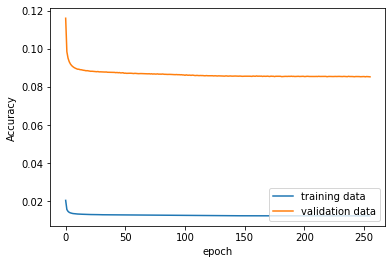

In [31]:
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## Small Validation NN

In [32]:
modelsv = Sequential()
modelsv.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelsv.add(Dense(7, activation='relu'))
modelsv.add(Dense(1, activation='sigmoid'))

In [33]:
# Too Small Validation Set
modelsv.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historysv = modelsv.fit(XTRAIN_2, YTRAIN_2, validation_data=(XVALID_2, YVALID_2), epochs = 256, batch_size=128, verbose=1)

{'verbose': 0, 'epochs': 256, 'steps': 499}


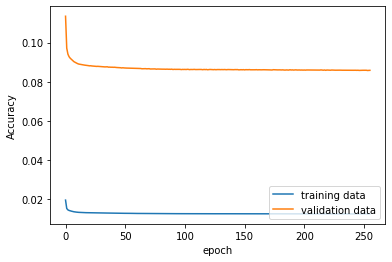

In [42]:
print(historysv.params)
plt.plot(historysv.history['loss']) # replace with accuracy/MAE
plt.plot(historysv.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

##Small Training NN

In [36]:
modelst = Sequential()
modelst.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelst.add(Dense(7, activation='relu'))
modelst.add(Dense(1, activation='sigmoid'))

In [38]:
# Too Small Valid
modelst.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyst = modelst.fit(XTRAIN_98, YTRAIN_98, validation_data=(XVALID_98, YVALID_98), epochs = 256, batch_size=128, verbose=1)

Epoch 1/256
6/6 [==============================] - 1s 92ms/step - loss: 0.0248 - mae: 0.1287 - val_loss: 0.0257 - val_mae: 0.1314
Epoch 2/256
6/6 [==============================] - 0s 83ms/step - loss: 0.0245 - mae: 0.1281 - val_loss: 0.0255 - val_mae: 0.1309
Epoch 3/256
6/6 [==============================] - 1s 84ms/step - loss: 0.0243 - mae: 0.1275 - val_loss: 0.0253 - val_mae: 0.1304
Epoch 4/256
6/6 [==============================] - 0s 83ms/step - loss: 0.0241 - mae: 0.1267 - val_loss: 0.0252 - val_mae: 0.1296
Epoch 5/256
6/6 [==============================] - 0s 76ms/step - loss: 0.0239 - mae: 0.1258 - val_loss: 0.0250 - val_mae: 0.1290
Epoch 6/256
6/6 [==============================] - 0s 76ms/step - loss: 0.0237 - mae: 0.1250 - val_loss: 0.0248 - val_mae: 0.1285
Epoch 7/256
6/6 [==============================] - 0s 78ms/step - loss: 0.0235 - mae: 0.1244 - val_loss: 0.0246 - val_mae: 0.1280
Epoch 8/256
6/6 [==============================] - 0s 77ms/step - loss: 0.0232 - mae: 0.12

{'verbose': 1, 'epochs': 256, 'steps': 6}


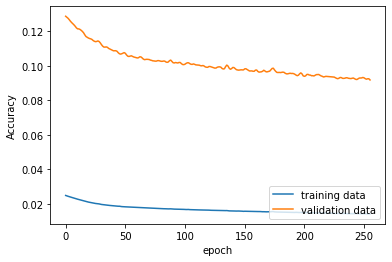

In [41]:
print(historyst.params)
plt.plot(historyst.history['loss']) # replace with accuracy/MAE
plt.plot(historyst.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

##Underfit NN


In [43]:
modelu = Sequential()
modelu.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelu.add(Dense(7, activation='relu'))
modelu.add(Dense(1, activation='sigmoid'))

In [44]:
modelu.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyu = modelu.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 10, batch_size=128, verbose=1)

Epoch 1/10
179/179 [==============================] - 1s 3ms/step - loss: 0.0200 - mae: 0.1152 - val_loss: 0.0171 - val_mae: 0.1032
Epoch 2/10
179/179 [==============================] - 1s 3ms/step - loss: 0.0158 - mae: 0.0991 - val_loss: 0.0155 - val_mae: 0.0969
Epoch 3/10
179/179 [==============================] - 1s 3ms/step - loss: 0.0150 - mae: 0.0962 - val_loss: 0.0150 - val_mae: 0.0950
Epoch 4/10
179/179 [==============================] - 1s 3ms/step - loss: 0.0147 - mae: 0.0949 - val_loss: 0.0147 - val_mae: 0.0947
Epoch 5/10
179/179 [==============================] - 0s 3ms/step - loss: 0.0144 - mae: 0.0941 - val_loss: 0.0145 - val_mae: 0.0930
Epoch 6/10
179/179 [==============================] - 1s 3ms/step - loss: 0.0142 - mae: 0.0933 - val_loss: 0.0142 - val_mae: 0.0926
Epoch 7/10
179/179 [==============================] - 1s 3ms/step - loss: 0.0140 - mae: 0.0926 - val_loss: 0.0140 - val_mae: 0.0919
Epoch 8/10
179/179 [==============================] - 1s 3ms/step - loss: 0.

{'verbose': 1, 'epochs': 10, 'steps': 179}


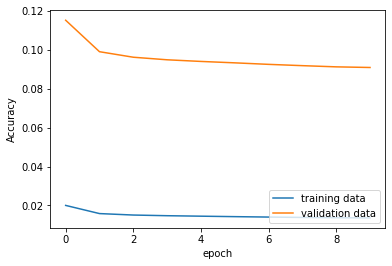

In [45]:
print(historyu.params)
plt.plot(historyu.history['loss']) # replace with accuracy/MAE
plt.plot(historyu.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

##Overfit NN

In [46]:
modelo = Sequential()
modelo.add(Dense(130, input_dim=len(XTRAIN[0, :]), activation='relu'))
modelo.add(Dense(130, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [48]:
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
historyo = modelo.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, batch_size=128, verbose=1)

Epoch 1/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0104 - mae: 0.0786 - val_loss: 0.0131 - val_mae: 0.0875
Epoch 2/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0104 - mae: 0.0784 - val_loss: 0.0129 - val_mae: 0.0860
Epoch 3/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0103 - mae: 0.0781 - val_loss: 0.0132 - val_mae: 0.0880
Epoch 4/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0104 - mae: 0.0782 - val_loss: 0.0133 - val_mae: 0.0863
Epoch 5/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0104 - mae: 0.0782 - val_loss: 0.0131 - val_mae: 0.0873
Epoch 6/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0104 - mae: 0.0784 - val_loss: 0.0132 - val_mae: 0.0869
Epoch 7/256
179/179 [==============================] - 1s 3ms/step - loss: 0.0103 - mae: 0.0782 - val_loss: 0.0133 - val_mae: 0.0870
Epoch 8/256
179/179 [==============================] - 1s 3ms/step - 

{'verbose': 1, 'epochs': 256, 'steps': 179}


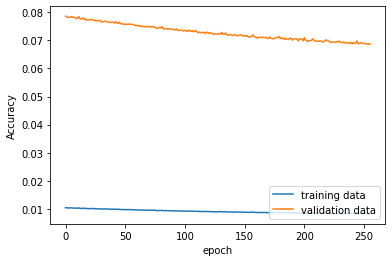

In [49]:
print(historyo.params)
plt.plot(historyo.history['loss']) # replace with accuracy/MAE
plt.plot(historyo.history['mae']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()